# Dataset Visualization

In this notebook we visualize the dataset for our continual learning task.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import cv2
import ntpath

import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = 'data'
path = os.path.join(data_path,'driving_log.csv')
print("CSV File Path :", path)

CSV File Path : data/driving_log.csv


In [3]:
data = pd.read_csv(path)
data.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [4]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

data.head()

,center,left,right,steering,throttle,brake,speed
0,center_2016_12_01_13_30_48_287.jpg,left_2016_12_01_13_30_48_287.jpg,right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,center_2016_12_01_13_30_48_404.jpg,left_2016_12_01_13_30_48_404.jpg,right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,center_2016_12_01_13_31_12_937.jpg,left_2016_12_01_13_31_12_937.jpg,right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,center_2016_12_01_13_31_13_037.jpg,left_2016_12_01_13_31_13_037.jpg,right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,center_2016_12_01_13_31_13_177.jpg,left_2016_12_01_13_31_13_177.jpg,right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [5]:
center = data[data.columns[0]].values
left = data[data.columns[1]].values
right = data[data.columns[2]].values
steering = data[data.columns[3]].values

no_of_examples = len(steering)
print("Total Number of Samples :", no_of_examples)

Total Number of Samples : 8036


[]

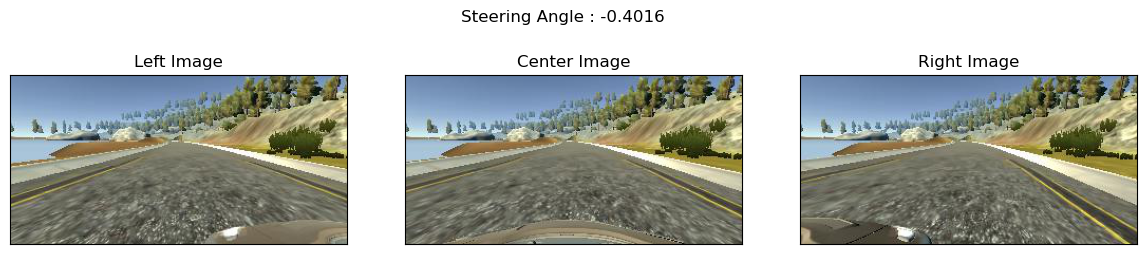

In [6]:
image_path = 'IMG'
image_path = os.path.join(data_path, image_path)

random_index = random.randint(0, no_of_examples)

left_image = mpimg.imread(os.path.join(image_path, left[random_index]))
center_image = mpimg.imread(os.path.join(image_path, center[random_index]))
right_image = mpimg.imread(os.path.join(image_path, right[random_index]))

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
fig.suptitle(f"Steering Angle : {steering[random_index]:.4f}")
fig.tight_layout()

axs[0].imshow(left_image)
axs[0].set_title('Left Image')
axs[0].get_xaxis().set_ticks([])
axs[0].get_yaxis().set_ticks([])
 
axs[1].imshow(center_image)
axs[1].set_title('Center Image')
axs[1].get_xaxis().set_ticks([])
axs[1].get_yaxis().set_ticks([])


axs[2].imshow(right_image)
axs[2].set_title('Right Image')
axs[2].get_xaxis().set_ticks([])
axs[2].get_yaxis().set_ticks([])

In [7]:
def random_flip(image, steering_angle):
    image = cv2.flip(image, 1)
    steering_angle = -steering_angle
    return image, steering_angle

In [8]:
x = []
y = []

steer_adjust_factor = 0.2
IMAGE_HEIGHT = 100 
IMAGE_WIDTH = 100

for i in range(3):
    for choice in range(3):
        if choice == 0: # Left Image
            img = cv2.imread(os.path.join(image_path, left[i]))
            steering_angle = steering[i] + steer_adjust_factor
        elif choice == 1: # Center Image
            img = cv2.imread(os.path.join(image_path, center[i]))
            steering_angle = steering[i]
        elif choice == 2: # Right Image
            img = cv2.imread(os.path.join(image_path, right[i]))
            steering_angle = steering[i] - steer_adjust_factor
        
        img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[:,:,1]
        img = img[50:,:]
        img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
        
        x.append(img)
        y.append(steering_angle)
        
        flipped_img, flipped_steering_angle = random_flip(img, steering_angle)
                
        x.append(flipped_img)
        y.append(flipped_steering_angle)

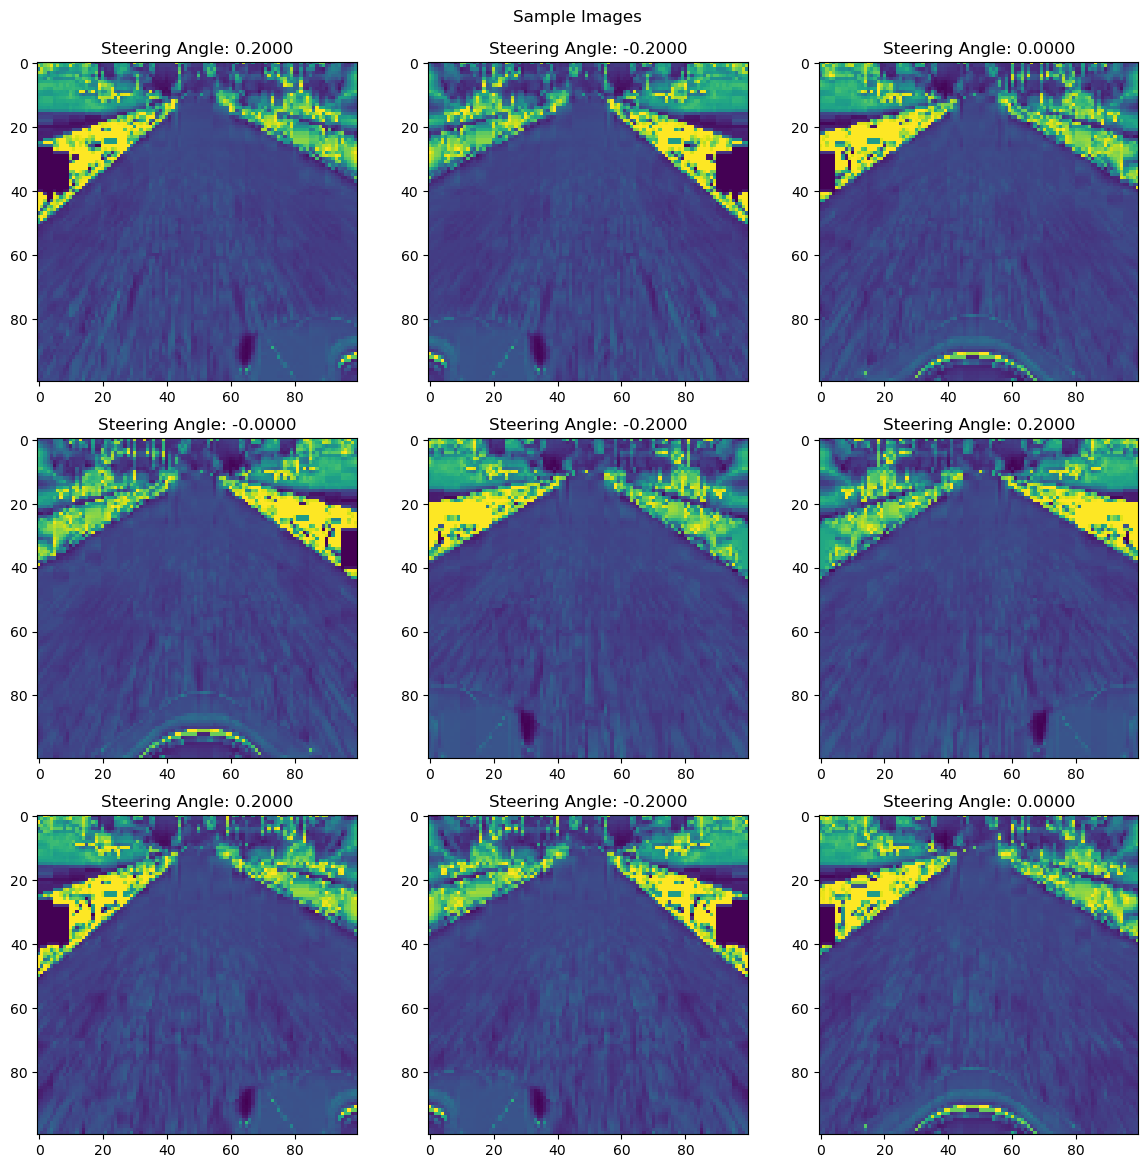

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle("Sample Images")
fig.tight_layout(pad=2.0)

index = 0

for i in range(3):
    for j in range(3):
        axs[i][j].imshow(x[index])
        axs[i][j].set_title(f"Steering Angle: {y[index]:.4f}")
        index += 1